In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sdss.metadata import MetaData

meta = MetaData()

In [48]:
# data directories
work = "/home/edgar/astropology"
data_directory = f"/home/edgar/odrive/portfolio/astropology/data/spectra"

In [49]:
spectra = np.load(f"{data_directory}/filtered_spectra.npy", mmap_mode="r")
specobjids = np.load(f"{data_directory}/ids_imputing.npy", mmap_mode="r")
wave = np.load(f"{data_directory}/wave.npy")

w_distances = np.load(
    f"{data_directory}/sdss_min_max_norm_wasserstein_45651.npy", mmap_mode="r"
)


objectid_w = np.load(
    f"{data_directory}/ids_imputing.npy", mmap_mode="r"
).astype(int)

In [50]:
w_score = np.empty(w_distances.shape[0])

for idx, score in enumerate(w_distances):

    w_score[idx] = np.nanmean(score)

w_score *= 1 / np.max(w_score)
w_rank = np.argsort(w_score)
w_ranked_objectid = objectid_w[w_rank]

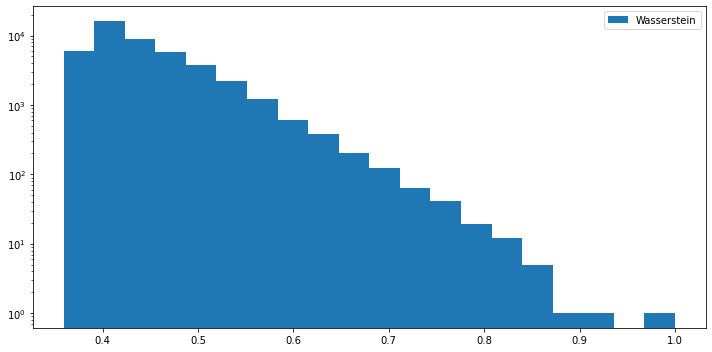

In [51]:
fig, ax = plt.subplots(
    sharey=True, ncols=1, nrows=1, tight_layout=True, figsize=(10, 5)
)
bins = 20
_ = ax.hist(w_score, bins=bins, label="Wasserstein")
ax.set_yscale("log")
ax.legend()

In [52]:
reshaped_specobjids = np.empty((spectra.shape[0],))
for idx, objectid in enumerate(specobjids[spectra.shape[0] :]):
    reshaped_specobjids[idx] = int(objectid)

reshaped_specobjids = reshaped_specobjids.astype(int)

In [53]:
reshaped_specobjids[0]

1621435005815252992

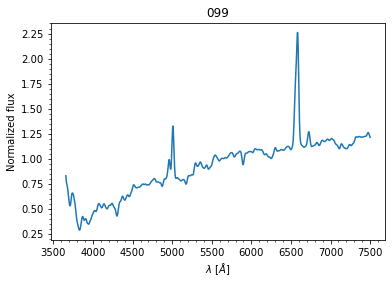

In [55]:
for rank in range(0, 100):
    rank *= 1
    object_idx = w_ranked_objectid[rank]
    spectrum = spectra[object_idx]

    plt.clf()
    plt.minorticks_on()
    plt.plot(wave, spectrum)
    plt.title(f"{abs(rank):03d}")
    plt.xlabel("$\lambda$ [$\AA$]")
    plt.ylabel("Normalized flux")

    save_to = "/home/edgar/Downloads/sdss/min_max_norm/normal"
    specobjid = reshaped_specobjids[object_idx]
    plt.savefig(f"{save_to}/{abs(rank):03d}_{specobjid}.pdf")